# Are All Taylor Swift Fans the Same? #
Natalie Gilles
10-15-2023
***
### Introduction ###
There are **a lot** of Taylor Swift fans in the world. Within Spotify, I wanted to test and see how similar the music selection of two Taylor Swift fans is. 
In order to accomplish this, I researched playlists that are named after the hit song "Karma," using the popular song lyric, "Karma is my boyfriend." I decided to go this route because from my own personal use of Spotify, I've noticed that a theme for playlist-naming is using short snippets from favorite songs, and adding similar music to that playlist. Hypothetically, two fans that listen to Taylor Swift should have similar song tastes, and therefore have duplicate song choices on their playlists. Statistically, it should be low to find the same songs in a playlist, due to the vast selection of songs available, but, using song titles or lyrics as playlist names may cause the statistical value to increase. But, I think that these two playlistlists will have at least 3 or 4 of the same songs on their playlist. I want to guarantee that they will both have the song "Karma," as that is the song they are referencing in their playlist name.

### General Process ###
In order to go through with this data analysis and research, I will need to collect the Playlist portion of Spotify API endpoints. I have found 2 playlists, of the same name, with the same amount of songs (66), which I will use to compare. These are suitable because they are both of the same Taylor Swift quote, and having the same amount of songs will make things go a little smoother.

#### Playlist 1 ####
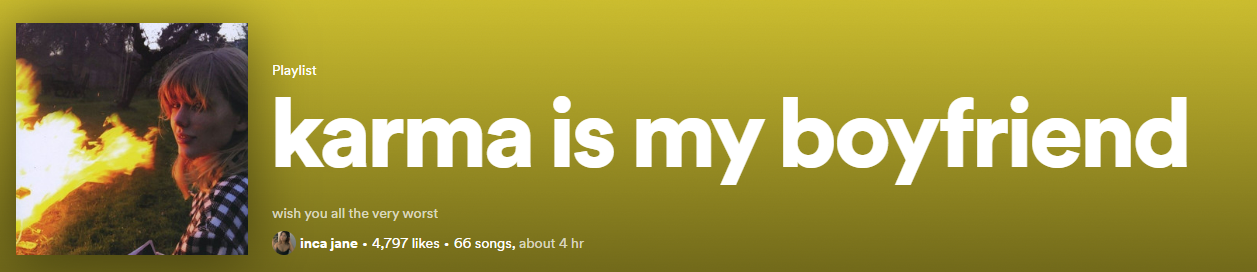

#### Playlist 2 ####
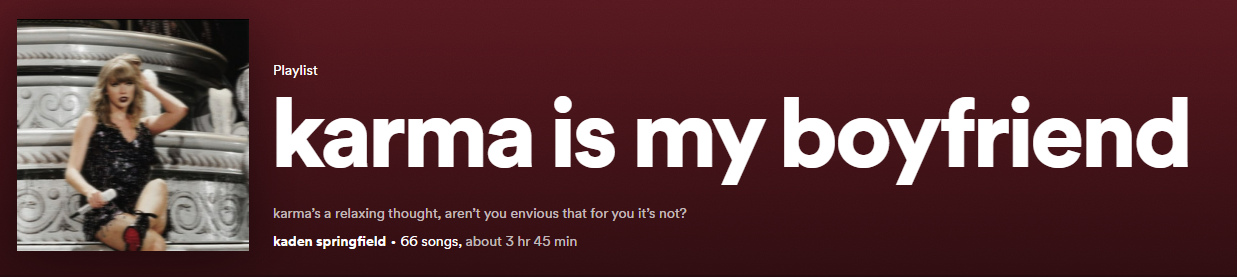

### Reliability? ###
In many ways, this data can be reliable and unreliable. It can be unreliable because the user could just be using this playlist name to something unrelated to Taylor Swift, or have it as a meme name. Like I mentioned above, statistically, it should be low to find the same songs in a playlist, due to the vast selection of songs available, but, using song titles or lyrics as playlist names may cause the statistical value to increase.
***

### Getting into the Spotify Server ###
First off, I need to import all the libraries I need in order.

In [53]:
import requests
import pandas as pd
import base64
import json
import urllib

Next is setting up everything to get into the Spotify data with my Client ID.

In [54]:
Client_ID = pd.read_csv('SpotifyKeys20230919.txt')['Client_ID'].iloc[0]

In [55]:
Client_Secret = pd.read_csv('SpotifyKeys20230919.txt')['Client_Secret'].iloc[0]

In [56]:
# Client_ID

In [57]:
# Client_Secret

In [58]:
client_cred = base64.b64encode(str(Client_ID + ":" + Client_Secret).encode("ascii"))

In [59]:
# client_cred

In [60]:
headers = {"Authorization": "Basic {}".format(client_cred.decode("ascii"))}

In [61]:
 # headers

In [62]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [63]:
session_key_response = requests.post(url = url, data = payload, headers = headers)

In [64]:
# session_key_response.json()['access_token']

In [65]:
session_header_key = session_key_response.json()

In [66]:
key = session_header_key['access_token']

In [67]:
session_headers = {"Authorization": "Bearer {}".format(key)}

In [68]:
# session_headers

With that done, I can now start to gather data from Spotify.

### Grabbing the Data ###
#### Playlist 1 ####
Next up, I am going to go through the process of gathering a list of the songs for one of the playlists first. Using the playlist URI, I can gather that information in a text form.

In [69]:
playlist1_id = '4roYEm084bkSdBN1rcuYm7'

In [70]:
show_url = 'https://api.spotify.com/v1/playlists/{}/tracks'.format(playlist1_id)

In [71]:
response = requests.get(url = show_url, headers = session_headers)

In [72]:
response.status_code

200

The lucky number 200 means it worked!

In [73]:
response.text

'{\n  "href" : "https://api.spotify.com/v1/playlists/4roYEm084bkSdBN1rcuYm7/tracks?offset=0&limit=100",\n  "items" : [ {\n    "added_at" : "2022-10-21T14:04:36Z",\n    "added_by" : {\n      "external_urls" : {\n        "spotify" : "https://open.spotify.com/user/incatan99"\n      },\n      "href" : "https://api.spotify.com/v1/users/incatan99",\n      "id" : "incatan99",\n      "type" : "user",\n      "uri" : "spotify:user:incatan99"\n    },\n    "is_local" : false,\n    "primary_color" : null,\n    "track" : {\n      "album" : {\n        "album_type" : "album",\n        "artists" : [ {\n          "external_urls" : {\n            "spotify" : "https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02"\n          },\n          "href" : "https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02",\n          "id" : "06HL4z0CvFAxyc27GXpf02",\n          "name" : "Taylor Swift",\n          "type" : "artist",\n          "uri" : "spotify:artist:06HL4z0CvFAxyc27GXpf02"\n        } ],\n        "availab

With this text, I can now translate it into a .json format.

In [74]:
data = response.json()

In [75]:
data

{'href': 'https://api.spotify.com/v1/playlists/4roYEm084bkSdBN1rcuYm7/tracks?offset=0&limit=100',
 'items': [{'added_at': '2022-10-21T14:04:36Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/incatan99'},
    'href': 'https://api.spotify.com/v1/users/incatan99',
    'id': 'incatan99',
    'type': 'user',
    'uri': 'spotify:user:incatan99'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
       'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
       'id': '06HL4z0CvFAxyc27GXpf02',
       'name': 'Taylor Swift',
       'type': 'artist',
       'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
     'available_markets': ['AR',
      'AU',
      'AT',
      'BE',
      'BO',
      'BR',
      'BG',
      'CA',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DK',
      'DO

Now, I can put this into a dataframe to look at it easier, looking specifically at the "items" section.

In [76]:
p1_df = pd.DataFrame(data['items'])

In [77]:
p1_df

,added_at,added_by,is_local,primary_color,track,video_thumbnail
0,2022-10-21T14:04:36Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
1,2022-10-22T16:23:46Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
2,2021-08-02T01:28:07Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
3,2023-07-07T07:24:49Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
4,2022-12-18T08:25:34Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
...,...,...,...,...,...,...
61,2022-12-26T10:46:56Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
62,2023-02-05T11:43:40Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
63,2023-02-17T05:34:12Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
64,2023-03-21T09:29:38Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}


Now, I can look through the keys to find what I need, to I will look to in items, then track, then name, to grab the names of the songs.

In [78]:
data['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [79]:
data['items'][0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [80]:
data['items'][0]['track']['name']

'Karma'

Now that I know I have singled out the song names, I can now use a function to move all those into a list.

In [81]:
[x['name'] for x in p1_df['track']]

['Karma',
 'I Did Something Bad',
 'Happier Than Ever',
 "Better Than Revenge (Taylor's Version)",
 'firearm',
 'Vicious',
 "Dear John (Taylor's Version)",
 'vampire',
 "Mean (Taylor's Version)",
 '...Ready For It?',
 "Babe (Taylor's Version) (From The Vault)",
 'Vigilante Shit',
 'Blonde',
 "Would've, Could've, Should've",
 'Go Getter',
 'Not Another Rockstar',
 "i'm too pretty for this",
 'Selfish',
 'Memories',
 'because i liked a boy',
 'Look What You Made Me Do',
 'Crisis',
 "you don't deserve these tears",
 "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)",
 'get him back!',
 'hate to be you',
 'i hope ur miserable until ur dead',
 'I Hate U',
 'Set Me Free',
 'deja vu',
 'Friend',
 'I Forgot That You Existed',
 'Dead',
 'Needed Me',
 'Josslyn',
 'Hurts Like Hell (feat. Offset)',
 'BITCH (takes one to know one)',
 'Death By A Thousand Cuts',
 'good 4 u',
 'Dead To Me',
 'Checkmate',
 "Ain't Shit",
 'Mr. Perfectly Fine (Taylor’s Version) (From The Vault)',
 'M

In [82]:
p1_list = [x['name'] for x in p1_df['track']]

In [83]:
p1_list

['Karma',
 'I Did Something Bad',
 'Happier Than Ever',
 "Better Than Revenge (Taylor's Version)",
 'firearm',
 'Vicious',
 "Dear John (Taylor's Version)",
 'vampire',
 "Mean (Taylor's Version)",
 '...Ready For It?',
 "Babe (Taylor's Version) (From The Vault)",
 'Vigilante Shit',
 'Blonde',
 "Would've, Could've, Should've",
 'Go Getter',
 'Not Another Rockstar',
 "i'm too pretty for this",
 'Selfish',
 'Memories',
 'because i liked a boy',
 'Look What You Made Me Do',
 'Crisis',
 "you don't deserve these tears",
 "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)",
 'get him back!',
 'hate to be you',
 'i hope ur miserable until ur dead',
 'I Hate U',
 'Set Me Free',
 'deja vu',
 'Friend',
 'I Forgot That You Existed',
 'Dead',
 'Needed Me',
 'Josslyn',
 'Hurts Like Hell (feat. Offset)',
 'BITCH (takes one to know one)',
 'Death By A Thousand Cuts',
 'good 4 u',
 'Dead To Me',
 'Checkmate',
 "Ain't Shit",
 'Mr. Perfectly Fine (Taylor’s Version) (From The Vault)',
 'M

#### Playlist 2 ####
I will repeat the process with playlist 2.

In [84]:
playlist2_id = '7ptxzI5RHInWbmCf8tAY4J'

In [85]:
show_url2 = 'https://api.spotify.com/v1/playlists/{}/tracks'.format(playlist2_id)

In [86]:
response2 = requests.get(url = show_url2, headers = session_headers)

In [87]:
response2.text

'{\n  "href" : "https://api.spotify.com/v1/playlists/7ptxzI5RHInWbmCf8tAY4J/tracks?offset=0&limit=100",\n  "items" : [ {\n    "added_at" : "2023-09-26T01:05:00Z",\n    "added_by" : {\n      "external_urls" : {\n        "spotify" : "https://open.spotify.com/user/cylne35zs0x4b0ie2mezrxb7b"\n      },\n      "href" : "https://api.spotify.com/v1/users/cylne35zs0x4b0ie2mezrxb7b",\n      "id" : "cylne35zs0x4b0ie2mezrxb7b",\n      "type" : "user",\n      "uri" : "spotify:user:cylne35zs0x4b0ie2mezrxb7b"\n    },\n    "is_local" : false,\n    "primary_color" : null,\n    "track" : {\n      "album" : {\n        "album_type" : "album",\n        "artists" : [ {\n          "external_urls" : {\n            "spotify" : "https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02"\n          },\n          "href" : "https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02",\n          "id" : "06HL4z0CvFAxyc27GXpf02",\n          "name" : "Taylor Swift",\n          "type" : "artist",\n          "uri" : "spotif

In [88]:
data2 = response2.json()

In [89]:
p2_df = pd.DataFrame(data2['items'])

In [90]:
p2_df

,added_at,added_by,is_local,primary_color,track,video_thumbnail
0,2023-09-26T01:05:00Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
1,2023-09-26T01:05:26Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
2,2023-09-26T01:05:51Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
3,2023-09-26T01:06:10Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
4,2023-09-26T01:06:10Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
...,...,...,...,...,...,...
61,2023-09-28T22:49:26Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
62,2023-09-28T22:49:31Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
63,2023-09-28T22:50:24Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
64,2023-09-28T22:50:39Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}


In [91]:
p2_list = [x['name'] for x in p2_df['track']]

In [92]:
p2_list

['Karma',
 'Karma (feat. Ice Spice)',
 'Vigilante Shit',
 '...Ready For It?',
 'End Game',
 'I Did Something Bad',
 'Don’t Blame Me',
 'Delicate',
 'Look What You Made Me Do',
 'So It Goes...',
 'Gorgeous',
 'Getaway Car',
 'King Of My Heart',
 'Dancing With Our Hands Tied',
 'Dress',
 "This Is Why We Can't Have Nice Things",
 'Call It What You Want',
 'Typa Girl',
 'How You Like That',
 'DDU-DU DDU-DU',
 'BOOMBAYAH',
 'PLAYING WITH FIRE',
 'Pretty Savage',
 'Kill This Love',
 'Shut Down',
 'THE GIRLS - BLACKPINK THE GAME OST',
 'Pink Venom',
 'BIBI Vengeance',
 'Eve, Psyche & The Bluebeard’s wife',
 'Tia Tamera (feat. Rico Nasty)',
 'Cyber Sex',
 'Rules',
 'Get Into It (Yuh)',
 'Need to Know',
 "Ain't Shit",
 'Agora Hills',
 'Dangerous Woman',
 "break up with your girlfriend, i'm bored",
 'nasty',
 'Barbie World (with Aqua) [From Barbie The Album]',
 'Chun-Li',
 'Good Form',
 'Feeling Myself',
 'Va Va Voom',
 'Poker Face',
 'Telephone',
 'Just Dance',
 'Judas',
 'Deja Vu (feat. Jay-Z)

### Data Combination ###
Next up, I decided that it would be easiest if I combined the 2 lists, and sort the songs by alphabetical order.

In [93]:
combined_list = p1_list + p2_list
combined_list

['Karma',
 'I Did Something Bad',
 'Happier Than Ever',
 "Better Than Revenge (Taylor's Version)",
 'firearm',
 'Vicious',
 "Dear John (Taylor's Version)",
 'vampire',
 "Mean (Taylor's Version)",
 '...Ready For It?',
 "Babe (Taylor's Version) (From The Vault)",
 'Vigilante Shit',
 'Blonde',
 "Would've, Could've, Should've",
 'Go Getter',
 'Not Another Rockstar',
 "i'm too pretty for this",
 'Selfish',
 'Memories',
 'because i liked a boy',
 'Look What You Made Me Do',
 'Crisis',
 "you don't deserve these tears",
 "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)",
 'get him back!',
 'hate to be you',
 'i hope ur miserable until ur dead',
 'I Hate U',
 'Set Me Free',
 'deja vu',
 'Friend',
 'I Forgot That You Existed',
 'Dead',
 'Needed Me',
 'Josslyn',
 'Hurts Like Hell (feat. Offset)',
 'BITCH (takes one to know one)',
 'Death By A Thousand Cuts',
 'good 4 u',
 'Dead To Me',
 'Checkmate',
 "Ain't Shit",
 'Mr. Perfectly Fine (Taylor’s Version) (From The Vault)',
 'M

In [94]:
sorted_list = sorted(combined_list)

In [95]:
sorted_list

['...Ready For It?',
 '...Ready For It?',
 '1991',
 '212',
 'AMERICA HAS A PROBLEM',
 'Agora Hills',
 "Ain't Shit",
 "Ain't Shit",
 "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)",
 'BANG BANG!',
 'BIBI Vengeance',
 'BITCH (takes one to know one)',
 'BOOMBAYAH',
 "Babe (Taylor's Version) (From The Vault)",
 'Barbie World (with Aqua) [From Barbie The Album]',
 "Better Than Revenge (Taylor's Version)",
 "Better Than Revenge (Taylor's Version)",
 'Blonde',
 'Call It What You Want',
 'Checkmate',
 'Chun-Li',
 'Crisis',
 'Cyber Sex',
 'DDU-DU DDU-DU',
 'Dancing With Our Hands Tied',
 'Dangerous Woman',
 'Dead',
 'Dead To Me',
 "Dear John (Taylor's Version)",
 'Death By A Thousand Cuts',
 'Deja Vu (feat. Jay-Z) - Homecoming Live',
 'Delicate',
 'Don’t Blame Me',
 'Dress',
 'End Game',
 'Eve, Psyche & The Bluebeard’s wife',
 'Eventually',
 'Feather',
 'Feeling Myself',
 'Friend',
 'Fumbled the Bag',
 'Get Into It (Yuh)',
 'Getaway Car',
 'Go Getter',
 'Good Form',
 'Goo

With this sorted list, I can now create a new Data Frame to store this data.

In [96]:
final_df = pd.DataFrame({'all songs': sorted_list})

Next, I wanted to find a way to filter out the songs that were duplicates. To do that, I had to do a bit of personal research. I found that using the `.duplicated` function, I could sort the songs by true and false, depending on if they had the same name or not.

In [97]:
is_duplicate = final_df.duplicated(keep=False)

Here is the data of the songs that do and do not have a duplicate.

In [98]:
is_duplicate

0       True
1       True
2      False
3      False
4      False
       ...  
127    False
128    False
129    False
130    False
131    False
Length: 132, dtype: bool

Lastly, I can now create a Data Frame of only the duplicate songs, revealing the number of songs that were on both playlists, and know which songs they are.

In [99]:
duplicate_df = final_df[is_duplicate]

In [100]:
duplicate_df

,all songs
0,...Ready For It?
1,...Ready For It?
6,Ain't Shit
7,Ain't Shit
15,Better Than Revenge (Taylor's Version)
16,Better Than Revenge (Taylor's Version)
51,I Did Something Bad
52,I Did Something Bad
58,Karma
59,Karma


### Conclusion ###
Based on this final data collection, I can see that both playlists that are named after the hit song "Karma," using the popular song lyric, "Karma is my boyfriend," have more songs in common than I thought. Nine out of the 66 songs were the same, meaning that their music similarities are about 13.6% similar. Based on this, I can conclude that Taylor Swift fans will have very similar music choice, espically when it comes to pick Taylor Swift Songs, and songs that are similar to her music. 

This is also not an "end all be all" conclusion, because I barely scratched the surface of analysing similarities in Taylor Swift Fans. The size of this sample may be limited, and the analysis does not account for the individual diversity of Taylor Swift fans.
If I were to go farther into this research, I would grab more playlists that have the same name, and look statistically at that. I would also dive into the songs that were not Taylor Swift songs, to see if the music type, like danceability, were similar.
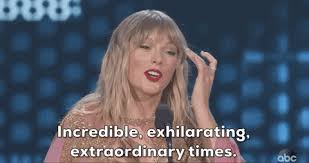